In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg


# Sample dataframe based on the provided image


df = pd.read_csv("../../data/income_wellbeing.csv")
df

,wellbeing,log_income,income,income_above_100
0,83.590,10.46,35000.0,0
1,85.322,12.07,175000.0,1
2,57.565,10.13,25000.0,0
3,64.169,11.35,85000.0,0
4,56.386,11.46,95000.0,0
...,...,...,...,...
33386,59.820,12.07,175000.0,1
33387,66.857,10.92,55000.0,0
33388,62.000,10.92,55000.0,0
33389,55.621,11.23,75000.0,0


        income_bin  count  avg_happiness  bin_center
0   (9.619, 10.13]   3626      61.551786       9.875
1   (10.13, 10.46]   2620      62.376019      10.295
2   (10.46, 10.71]   2647      62.660942      10.585
3   (10.71, 10.92]   2709      62.834313      10.815
4   (10.92, 11.08]   2377      63.014824      11.000
5   (11.08, 11.23]   2355      63.287335      11.155
6   (11.23, 11.35]   2069      63.550883      11.290
7   (11.35, 11.46]   2226      63.739698      11.405
8   (11.46, 11.63]   3710      63.916470      11.545
9   (11.63, 11.83]   2856      64.191158      11.730
10  (11.83, 12.07]   3168      64.438037      11.950
11  (12.07, 12.43]   1776      65.536609      12.250
12  (12.43, 13.35]   1252      65.650716      12.890


/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_63844/123180150.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("income_bin")


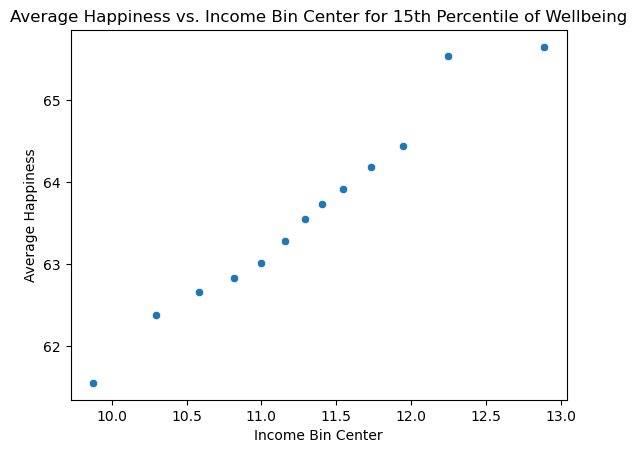

In [29]:
# Step 2: Create bins for the 'income' column using pd.qcut with 'duplicates' set to 'drop'
df["income_bin"], bin_edges = pd.qcut(
    df["log_income"], 15, retbins=True, duplicates="drop"
)

# Calculate the bin center as the midpoint between bin edges
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Step 3: Calculate statistics for each bin
bin_stats = (
    df.groupby("income_bin")
    .agg(count=("wellbeing", "size"), avg_happiness=("wellbeing", "mean"))
    .reset_index()
)

# Add bin centers to the bin_stats dataframe
bin_stats["bin_center"] = bin_centers

# Print the bin statistics
print(bin_stats)

# Step 4: Plotting
sns.scatterplot(x="bin_center", y="avg_happiness", data=bin_stats)
plt.xlabel("Income Bin Center")
plt.ylabel("Average Happiness")
plt.title("Average Happiness vs. Income Bin Center for 15th Percentile of Wellbeing")
plt.show()

In [30]:
regression_results = pg.linear_regression(
    bin_stats["bin_center"], bin_stats["avg_happiness"], weights=bin_stats["count"]
)

# Display regression results
print(regression_results)

        names       coef        se          T          pval        r2  \
0   Intercept  47.521759  0.752340  63.165233  1.939621e-15  0.976101   
1  bin_center   1.423033  0.067138  21.195801  2.863891e-10  0.976101   

     adj_r2   CI[2.5%]  CI[97.5%]  
0  0.973928  45.865869  49.177649  
1  0.973928   1.275265   1.570802  


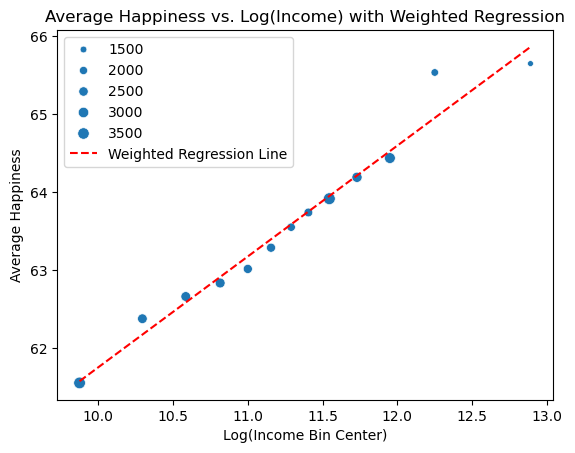

In [31]:
# Step 3: Plot the data and the regression line
sns.scatterplot(x="bin_center", y="avg_happiness", size="count", data=bin_stats)
plt.xlabel("Log(Income Bin Center)")
plt.ylabel("Average Happiness")
plt.title("Average Happiness vs. Log(Income) with Weighted Regression")

# Add regression line
slope = regression_results["coef"][1]
intercept = regression_results["coef"][0]
x_vals = np.array(bin_stats["bin_center"])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color="red", linestyle="--", label="Weighted Regression Line")

plt.legend()
plt.show()

              income_bin  count  avg_happiness  bin_center
0   (14999.999, 25000.0]   3626      61.551786     20000.0
1     (25000.0, 35000.0]   2620      62.376019     30000.0
2     (35000.0, 45000.0]   2647      62.660942     40000.0
3     (45000.0, 55000.0]   2709      62.834313     50000.0
4     (55000.0, 65000.0]   2377      63.014824     60000.0
5     (65000.0, 75000.0]   2355      63.287335     70000.0
6     (75000.0, 85000.0]   2069      63.550883     80000.0
7     (85000.0, 95000.0]   2226      63.739698     90000.0
8    (95000.0, 112500.0]   3710      63.916470    103750.0
9   (112500.0, 137500.0]   2856      64.191158    125000.0
10  (137500.0, 175000.0]   3168      64.438037    156250.0
11  (175000.0, 250000.0]   1776      65.536609    212500.0
12  (250000.0, 625000.0]   1252      65.650716    437500.0


/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_63844/222785091.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("income_bin")


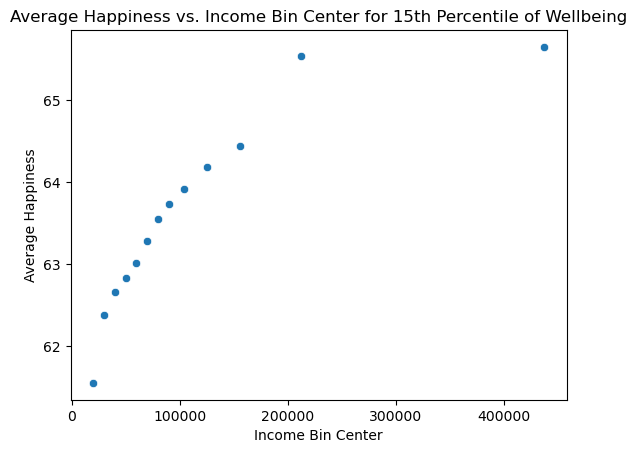

In [32]:
# Step 2: Create bins for the 'income' column using pd.qcut with 'duplicates' set to 'drop'
df["income_bin"], bin_edges = pd.qcut(
    df["income"], 15, retbins=True, duplicates="drop"
)

# Calculate the bin center as the midpoint between bin edges
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Step 3: Calculate statistics for each bin
bin_stats = (
    df.groupby("income_bin")
    .agg(count=("wellbeing", "size"), avg_happiness=("wellbeing", "mean"))
    .reset_index()
)

# Add bin centers to the bin_stats dataframe
bin_stats["bin_center"] = bin_centers

# Print the bin statistics
print(bin_stats)

# Step 4: Plotting
sns.scatterplot(x="bin_center", y="avg_happiness", data=bin_stats)
plt.xlabel("Income Bin Center")
plt.ylabel("Average Happiness")
plt.title("Average Happiness vs. Income Bin Center for 15th Percentile of Wellbeing")
plt.show()